#### Load Dataset

In [1]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import reuters
from keras import models, layers
from keras.callbacks import EarlyStopping

In [2]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000)

In [3]:
print(x_train[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [4]:
print(max([max(max(x) for x in x_train)]))
# max index cnt

9999


In [5]:
word_index = reuters.get_word_index()
iw = {}
for key, value in word_index.items():
    iw[value] = key

# key, value 위치 변환

In [6]:
for i in x_train[0]:
    print(iw[i], end=' ')

print('\n')
print(iw[4499])

# 변환 결과 확인

the of of mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs 

tokyo's


#### 데이터 가공

In [7]:
import vectorize

In [8]:
x_train = vectorize.vectorize_sequences(x_train)
x_test = vectorize.vectorize_sequences(x_test)

In [9]:
# label encoding

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [10]:
y_train = to_one_hot(y_train)
y_test = to_one_hot(y_test)

#### Define model

In [11]:
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [12]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#### 검증

In [13]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [14]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20


2023-07-14 14:05:49.332070: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


16/16 [==============================] - 1s 21ms/step - loss: 2.7543 - accuracy: 0.5357 - val_loss: 1.8442 - val_accuracy: 0.6580
Epoch 2/20
16/16 [==============================] - 0s 11ms/step - loss: 1.4740 - accuracy: 0.7136 - val_loss: 1.3398 - val_accuracy: 0.7140
Epoch 3/20
16/16 [==============================] - 0s 12ms/step - loss: 1.0754 - accuracy: 0.7730 - val_loss: 1.1488 - val_accuracy: 0.7450
Epoch 4/20
16/16 [==============================] - 0s 11ms/step - loss: 0.8480 - accuracy: 0.8170 - val_loss: 1.0504 - val_accuracy: 0.7730
Epoch 5/20
16/16 [==============================] - 0s 10ms/step - loss: 0.6717 - accuracy: 0.8586 - val_loss: 0.9834 - val_accuracy: 0.7930
Epoch 6/20
16/16 [==============================] - 0s 12ms/step - loss: 0.5366 - accuracy: 0.8871 - val_loss: 0.9623 - val_accuracy: 0.7910
Epoch 7/20
16/16 [==============================] - 0s 14ms/step - loss: 0.4332 - accuracy: 0.9113 - val_loss: 0.9250 - val_accuracy: 0.8110
Epoch 8/20
16/16 [======

##### 훈련, 검증 손실 시각화

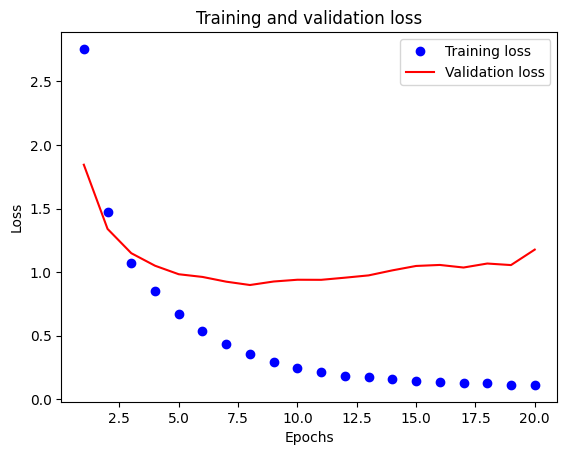

In [15]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

##### 훈련, 검증 정확도 시각화

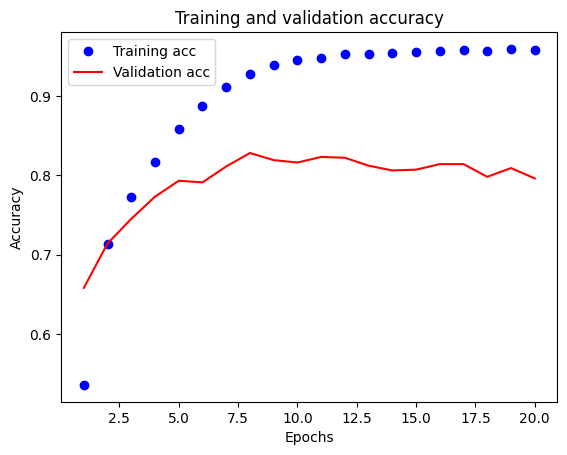

In [16]:
plt.clf() # reset plt
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## 9번째 epoch에서 Overfitting 발생

#### 재검증

In [17]:
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [18]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(x_train, y_train, epochs=20, batch_size=512, callbacks=[EarlyStopping()], validation_data=(x_val, y_val))

Epoch 1/20
18/18 [==============================] - 1s 16ms/step - loss: 2.5488 - accuracy: 0.5199 - val_loss: 1.6055 - val_accuracy: 0.6840
Epoch 2/20
18/18 [==============================] - 0s 12ms/step - loss: 1.3784 - accuracy: 0.7109 - val_loss: 1.0756 - val_accuracy: 0.7750
Epoch 3/20
18/18 [==============================] - 0s 14ms/step - loss: 1.0148 - accuracy: 0.7787 - val_loss: 0.8019 - val_accuracy: 0.8380
Epoch 4/20
18/18 [==============================] - 0s 10ms/step - loss: 0.7910 - accuracy: 0.8321 - val_loss: 0.6134 - val_accuracy: 0.8760
Epoch 5/20
18/18 [==============================] - 0s 10ms/step - loss: 0.6227 - accuracy: 0.8707 - val_loss: 0.4761 - val_accuracy: 0.9130
Epoch 6/20
18/18 [==============================] - 0s 10ms/step - loss: 0.5014 - accuracy: 0.8957 - val_loss: 0.3685 - val_accuracy: 0.9310
Epoch 7/20
18/18 [==============================] - 0s 10ms/step - loss: 0.4021 - accuracy: 0.9142 - val_loss: 0.3285 - val_accuracy: 0.9350
Epoch 8/20
18

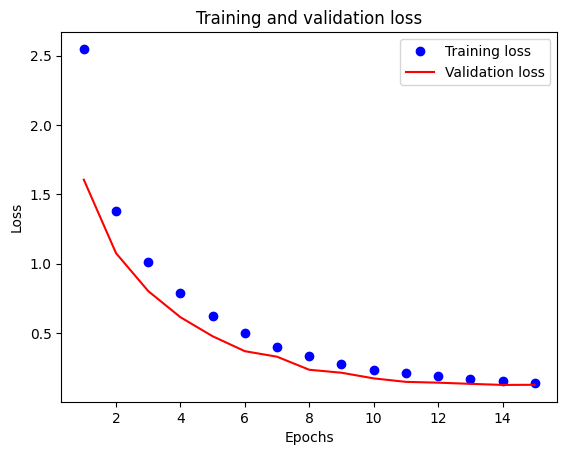

In [20]:
plt.clf()
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

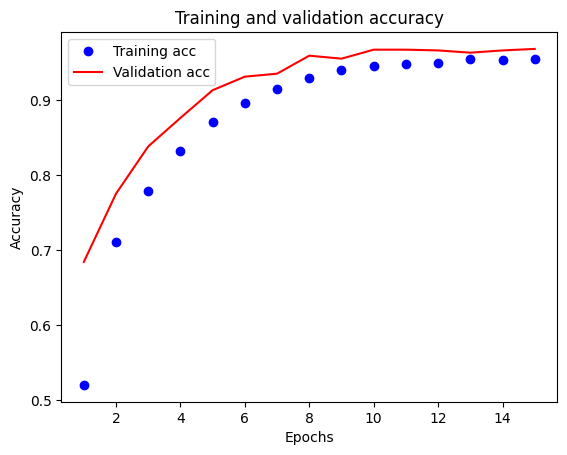

In [21]:
plt.clf() # reset plt
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## 9번째 epoch에서 Overfitting 발생